<a href="https://colab.research.google.com/github/khalilullahalfaath/case_based_1_ML/blob/main/Case_based_1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# library untuk preprocessing
# Untuk data imputation
from sklearn.impute import SimpleImputer 

# Untuk PCA
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

# Import dataset
Arrhythmia Data Set

In [2]:
df = pd.read_csv('https://github.com/khalilullahalfaath/case_based_1_ML/blob/ece335d372e8c3c2e1f525460dcd2624f6ad85d8/arrhythmia.data?raw=true',header = None)

https://github.com/khalilullahalfaath/case_based_1_ML/blob/ece335d372e8c3c2e1f525460dcd2624f6ad85d8/arrhythmia.data

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


Di sini nama kolom terdiri atas record pertama. Sehingga nama kolom harus dilabeli secara manual

# Data Preparation

## Set column name

Daftar nama kolom sesuai yang ada di data.name

In [4]:
columnName = "age	sex	height	weight	QRSduration	PRinterval	Q-Tinterval	Tinterval	Pinterval	QRS	T	P	QRST	J	heartrate	chDI_Qwave	chDI_Rwave	chDI_Swave	chDI_RPwave	chDI_SPwave	chDI_intrinsicReflecttions	chDI_RRwaveExists	chDI_DD_RRwaveExists	chDI_RPwaveExists	chDI_DD_RPwaveExists	chDI_RTwaveExists	chDI_DD_RTwaveExists	chDII_Qwave	chDII_Rwave	chDII_Swave	chDII_RPwave	chDII_SPwave	chDII_intrinsicReflecttions	chDII_RRwaveExists	chDII_DD_RRwaveExists	chDII_RPwaveExists	chDII_DD_RPwaveExists	chDII_RTwaveExists	chDII_DD_RTwaveExists	chDIII_Qwave	chDIII_Rwave	chDIII_Swave	chDIII_RPwave	chDIII_SPwave	chDIII_intrinsicReflecttions	chDIII_RRwaveExists	chDIII_DD_RRwaveExists	chDIII_RPwaveExists	chDIII_DD_RPwaveExists	chDIII_RTwaveExists	chDIII_DD_RTwaveExists	chAVR_Qwave	chAVR_Rwave	chAVR_Swave	chAVR_RPwave	chAVR_SPwave	chAVR_intrinsicReflecttions	chAVR_RRwaveExists	chAVR_DD_RRwaveExists	chAVR_RPwaveExists	chAVR_DD_RPwaveExists	chAVR_RTwaveExists	chAVR_DD_RTwaveExists	chAVL_Qwave	chAVL_Rwave	chAVL_Swave	chAVL_RPwave	chAVL_SPwave	chAVL_intrinsicReflecttions	chAVL_RRwaveExists	chAVL_DD_RRwaveExists	chAVL_RPwaveExists	chAVL_DD_RPwaveExists	chAVL_RTwaveExists	chAVL_DD_RTwaveExists	chAVF_Qwave	chAVF_Rwave	chAVF_Swave	chAVF_RPwave	chAVF_SPwave	chAVF_intrinsicReflecttions	chAVF_RRwaveExists	chAVF_DD_RRwaveExists	chAVF_RPwaveExists	chAVF_DD_RPwaveExists	chAVF_RTwaveExists	chAVF_DD_RTwaveExists	chV1_Qwave	chV1_Rwave	chV1_Swave	chV1_RPwave	chV1_SPwave	chV1_intrinsicReflecttions	chV1_RRwaveExists	chV1_DD_RRwaveExists	chV1_RPwaveExists	chV1_DD_RPwaveExists	chV1_RTwaveExists	chV1_DD_RTwaveExists	chV2_Qwave	chV2_Rwave	chV2_Swave	chV2_RPwave	chV2_SPwave	chV2_intrinsicReflecttions	chV2_RRwaveExists	chV2_DD_RRwaveExists	chV2_RPwaveExists	chV2_DD_RPwaveExists	chV2_RTwaveExists	chV2_DD_RTwaveExists	chV3_Qwave	chV3_Rwave	chV3_Swave	chV3_RPwave	chV3_SPwave	chV3_intrinsicReflecttions	chV3_RRwaveExists	chV3_DD_RRwaveExists	chV3_RPwaveExists	chV3_DD_RPwaveExists	chV3_RTwaveExists	chV3_DD_RTwaveExists	chV4_Qwave	chV4_Rwave	chV4_Swave	chV4_RPwave	chV4_SPwave	chV4_intrinsicReflecttions	chV4_RRwaveExists	chV4_DD_RRwaveExists	chV4_RPwaveExists	chV4_DD_RPwaveExists	chV4_RTwaveExists	chV4_DD_RTwaveExists	chV5_Qwave	chV5_Rwave	chV5_Swave	chV5_RPwave	chV5_SPwave	chV5_intrinsicReflecttions	chV5_RRwaveExists	chV5_DD_RRwaveExists	chV5_RPwaveExists	chV5_DD_RPwaveExists	chV5_RTwaveExists	chV5_DD_RTwaveExists	chV6_Qwave	chV6_Rwave	chV6_Swave	chV6_RPwave	chV6_SPwave	chV6_intrinsicReflecttions	chV6_RRwaveExists	chV6_DD_RRwaveExists	chV6_RPwaveExists	chV6_DD_RPwaveExists	chV6_RTwaveExists	chV6_DD_RTwaveExists	chDI_JJwaveAmp	chDI_QwaveAmp	chDI_RwaveAmp	chDI_SwaveAmp	chDI_RPwaveAmp	chDI_SPwaveAmp	chDI_PwaveAmp	chDI_TwaveAmp	chDI_QRSA	chDI_QRSTA	chDII_JJwaveAmp	chDII_QwaveAmp	chDII_RwaveAmp	chDII_SwaveAmp	chDII_RPwaveAmp	chDII_SPwaveAmp	chDII_PwaveAmp	chDII_TwaveAmp	chDII_QRSA	chDII_QRSTA	chDIII_JJwaveAmp	chDIII_QwaveAmp	chDIII_RwaveAmp	chDIII_SwaveAmp	chDIII_RPwaveAmp	chDIII_SPwaveAmp	chDIII_PwaveAmp	chDIII_TwaveAmp	chDIII_QRSA	chDIII_QRSTA	chAVR_JJwaveAmp	chAVR_QwaveAmp	chAVR_RwaveAmp	chAVR_SwaveAmp	chAVR_RPwaveAmp	chAVR_SPwaveAmp	chAVR_PwaveAmp	chAVR_TwaveAmp	chAVR_QRSA	chAVR_QRSTA	chAVL_JJwaveAmp	chAVL_QwaveAmp	chAVL_RwaveAmp	chAVL_SwaveAmp	chAVL_RPwaveAmp	chAVL_SPwaveAmp	chAVL_PwaveAmp	chAVL_TwaveAmp	chAVL_QRSA	chAVL_QRSTA	chAVF_JJwaveAmp	chAVF_QwaveAmp	chAVF_RwaveAmp	chAVF_SwaveAmp	chAVF_RPwaveAmp	chAVF_SPwaveAmp	chAVF_PwaveAmp	chAVF_TwaveAmp	chAVF_QRSA	chAVF_QRSTA	chV1_JJwaveAmp	chV1_QwaveAmp	chV1_RwaveAmp	chV1_SwaveAmp	chV1_RPwaveAmp	chV1_SPwaveAmp	chV1_PwaveAmp	chV1_TwaveAmp	chV1_QRSA	chV1_QRSTA	chV2_JJwaveAmp	chV2_QwaveAmp	chV2_RwaveAmp	chV2_SwaveAmp	chV2_RPwaveAmp	chV2_SPwaveAmp	chV2_PwaveAmp	chV2_TwaveAmp	chV2_QRSA	chV2_QRSTA	chV3_JJwaveAmp	chV3_QwaveAmp	chV3_RwaveAmp	chV3_SwaveAmp	chV3_RPwaveAmp	chV3_SPwaveAmp	chV3_PwaveAmp	chV3_TwaveAmp	chV3_QRSA	chV3_QRSTA	chV4_JJwaveAmp	chV4_QwaveAmp	chV4_RwaveAmp	chV4_SwaveAmp	chV4_RPwaveAmp	chV4_SPwaveAmp	chV4_PwaveAmp	chV4_TwaveAmp	chV4_QRSA	chV4_QRSTA	chV5_JJwaveAmp	chV5_QwaveAmp	chV5_RwaveAmp	chV5_SwaveAmp	chV5_RPwaveAmp	chV5_SPwaveAmp	chV5_PwaveAmp	chV5_TwaveAmp	chV5_QRSA	chV5_QRSTA	chV6_JJwaveAmp	chV6_QwaveAmp	chV6_RwaveAmp	chV6_SwaveAmp	chV6_RPwaveAmp	chV6_SPwaveAmp	chV6_PwaveAmp	chV6_TwaveAmp	chV6_QRSA	chV6_QRSTA	class"

Membuat list yang terdiri atas nama kolom dari string nama kolom

In [5]:
colName = columnName.split("\t")
print(colName)

['age', 'sex', 'height', 'weight', 'QRSduration', 'PRinterval', 'Q-Tinterval', 'Tinterval', 'Pinterval', 'QRS', 'T', 'P', 'QRST', 'J', 'heartrate', 'chDI_Qwave', 'chDI_Rwave', 'chDI_Swave', 'chDI_RPwave', 'chDI_SPwave', 'chDI_intrinsicReflecttions', 'chDI_RRwaveExists', 'chDI_DD_RRwaveExists', 'chDI_RPwaveExists', 'chDI_DD_RPwaveExists', 'chDI_RTwaveExists', 'chDI_DD_RTwaveExists', 'chDII_Qwave', 'chDII_Rwave', 'chDII_Swave', 'chDII_RPwave', 'chDII_SPwave', 'chDII_intrinsicReflecttions', 'chDII_RRwaveExists', 'chDII_DD_RRwaveExists', 'chDII_RPwaveExists', 'chDII_DD_RPwaveExists', 'chDII_RTwaveExists', 'chDII_DD_RTwaveExists', 'chDIII_Qwave', 'chDIII_Rwave', 'chDIII_Swave', 'chDIII_RPwave', 'chDIII_SPwave', 'chDIII_intrinsicReflecttions', 'chDIII_RRwaveExists', 'chDIII_DD_RRwaveExists', 'chDIII_RPwaveExists', 'chDIII_DD_RPwaveExists', 'chDIII_RTwaveExists', 'chDIII_DD_RTwaveExists', 'chAVR_Qwave', 'chAVR_Rwave', 'chAVR_Swave', 'chAVR_RPwave', 'chAVR_SPwave', 'chAVR_intrinsicReflecttions

Merename column

In [6]:
df.columns = colName

## Dataset yang sudah direname colomnnya

In [7]:
df

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


## Info tentang dataset

In [8]:
df.describe()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


## Handling missing value

In [9]:
df.columns[df.isin(['?']).any()]

Index(['T', 'P', 'QRST', 'J', 'heartrate'], dtype='object')

Mengubah tanda ? menjadi nan value

In [10]:
df = df.replace('?',np.nan)

In [11]:
df.columns[df.isin(['?']).any()]

Index([], dtype='object')

## Mencari data yang null dan total jumlah data nullnya

In [12]:
null = []
for i in df:
  value = []
  if df[i].isna().sum() > 0:
    value = [i,df[i].isna().sum()]
    null.append(value)

In [13]:
print(null)

[['T', 8], ['P', 22], ['QRST', 1], ['J', 376], ['heartrate', 1]]


In [14]:
df[df.columns[df.isnull().any()]]

,T,P,QRST,J,heartrate
0,13,64,-2,NaN,63
1,37,-17,31,NaN,53
2,34,70,66,23,75
3,11,-5,20,NaN,71
4,13,61,3,NaN,NaN
...,...,...,...,...,...
447,4,40,-27,NaN,63
448,66,52,79,NaN,73
449,-19,-61,-70,84,84
450,29,-22,43,103,80


**Ada beberapa teknik untuk menghandling missing value. Salah satunya adalah imputation data**

*Dengan data imputation, data yang null akan diisi dengan nilai yang dianggap sebagai rangkuman dari data (yang merepresentasikan data), seperti mean, modus, atau median.*

Di sini kita akan melakukan data imputation dengan nilai mean dari data



In [15]:
imputer = SimpleImputer(strategy = 'mean', missing_values = np.nan)
imputer.fit([df['T'],df['P'],df['QRST'],df['J'],df['heartrate']])
df['T'],df['P'],df['QRST'],df['J'],df['heartrate'] = imputer.transform([df['T'],df['P'],df['QRST'],df['J'],df['heartrate']])

In [16]:
df

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [17]:
null = []
for i in df:
  value = []
  if df[i].isna().sum() > 0:
    value = [i,df[i].isna().sum()]
    null.append(value)

In [18]:
print(null)

[]


## Data Quality

In [19]:
df.var()

age               271.149947
sex                 0.247959
height           1381.634181
weight            275.254729
QRSduration       236.064596
                    ...     
chV6_PwaveAmp       0.120778
chV6_TwaveAmp       2.033624
chV6_QRSA         182.355902
chV6_QRSTA        342.025335
class              19.422503
Length: 280, dtype: float64

In [20]:
df.cov()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
age,271.149947,-0.484121,-66.995688,104.238835,-1.020034,30.384666,107.580274,15.052857,42.423631,-198.896229,...,1.489630,-9.035978,2.716198,0.074616,0.0,-0.216757,-6.375520,4.012061,-60.823721,-6.704109
sex,-0.484121,0.247959,-2.307816,-2.049708,-2.579087,-1.044370,1.197820,-3.277893,-1.042354,1.570796,...,0.063119,-0.073734,0.092612,0.000684,0.0,0.002459,0.046643,0.213081,0.429192,-0.390803
height,-66.995688,-2.307816,1381.634181,-46.225011,-3.614701,22.669677,-294.493741,-50.875110,27.863911,103.921188,...,-0.385114,-9.480002,-6.800065,-0.004742,0.0,0.874146,-0.449001,-45.361018,-63.404933,1.089035
weight,104.238835,-2.049708,-46.225011,275.254729,25.514707,89.146886,65.722809,88.669442,51.704344,-130.665473,...,0.459605,-1.551434,1.725748,0.039453,0.0,-0.266832,-3.423992,13.954301,-15.550640,-6.591576
QRSduration,-1.020034,-2.579087,-3.614701,25.514707,236.064596,15.041010,112.171811,217.587956,19.714322,-101.941526,...,-1.677701,4.876116,-7.035838,-0.010547,0.0,-0.350258,-4.867839,26.930022,-23.524975,21.930597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chV6_PwaveAmp,-0.216757,0.002459,0.874146,-0.266832,-0.350258,2.232765,-0.405750,0.608960,2.226764,1.294821,...,-0.016299,-0.009671,-0.064071,-0.000347,0.0,0.120778,-0.021463,-0.327816,-0.412440,-0.132372
chV6_TwaveAmp,-6.375520,0.046643,-0.449001,-3.423992,-4.867839,3.910994,-1.851220,-9.392874,0.591253,4.101025,...,0.091547,0.464291,-0.206766,-0.001264,0.0,-0.021463,2.033624,-2.387990,18.141597,-0.193555
chV6_QRSA,4.012061,0.213081,-45.361018,13.954301,26.930022,-16.768074,115.503650,62.651220,-5.707433,182.688939,...,0.019494,31.486039,15.219149,-0.034605,0.0,-0.327816,-2.387990,182.355902,152.646266,0.206895
chV6_QRSTA,-60.823721,0.429192,-63.404933,-15.550640,-23.524975,17.455537,93.218440,-9.509126,2.045573,214.422819,...,0.837837,35.991044,12.646112,-0.046035,0.0,-0.412440,18.141597,152.646266,342.025335,-0.755977


# Data Preprocessing

**Mendrop kolom dengan hanya satu nilai**

In [21]:
col1len = []
for col in df:
    if (len(df[col].unique()) == 1):
      col1len.append(col)
print(col1len)

['chDI_SPwave', 'chAVL_SPwave', 'chAVL_RRwaveExists', 'chAVF_RPwaveExists', 'chV4_RPwaveExists', 'chV4_DD_RPwaveExists', 'chV5_SPwave', 'chV5_RRwaveExists', 'chV5_RPwaveExists', 'chV5_RTwaveExists', 'chV6_SPwave', 'chV6_DD_RPwaveExists', 'chV6_RTwaveExists', 'chDI_SPwaveAmp', 'chAVL_SPwaveAmp', 'chV5_SPwaveAmp', 'chV6_SPwaveAmp']


In [22]:
df = df.drop(col1len, axis=1)

## Data transformation using min max scaling

In [23]:
df_y = df['class']

In [24]:
def minMaxScaling(df) :
    return (df.iloc[:,:-1] - df.iloc[:,:-1].min()) / (df.iloc[:,:-1].max() - df.iloc[:,:-1].min())
df_normalized = minMaxScaling(df)

In [25]:
df_normalized

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV5_QRSTA,chV6_JJwaveAmp,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA
0,0.903614,0.0,0.125926,0.435294,0.270677,0.368321,0.501805,0.241758,0.590244,0.457478,...,0.660574,0.638554,1.000000,0.381356,0.968531,0.0,0.53125,0.741667,0.507519,0.569579
1,0.674699,1.0,0.088889,0.341176,0.195489,0.332061,0.610108,0.150183,0.190244,0.577713,...,0.558747,0.614458,1.000000,0.360169,1.000000,0.0,0.31250,0.675000,0.485714,0.500971
2,0.650602,0.0,0.099259,0.523529,0.624060,0.311069,0.555957,0.282051,0.497561,0.785924,...,0.583812,0.783133,1.000000,0.402542,0.916084,0.0,0.34375,0.783333,0.424812,0.566990
3,0.662651,0.0,0.103704,0.517647,0.338346,0.385496,0.534296,0.260073,0.697561,0.586510,...,0.687206,0.686747,1.000000,0.516949,0.923077,0.0,0.37500,0.716667,0.592481,0.648544
4,0.903614,0.0,0.125926,0.435294,0.248120,0.345420,0.462094,0.252747,0.502439,0.457478,...,0.587467,0.626506,1.000000,0.555085,0.874126,0.0,0.21875,0.825000,0.523308,0.656311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,0.638554,1.0,0.081481,0.376471,0.187970,0.379771,0.541516,0.168498,0.570732,0.395894,...,0.328982,0.674699,1.000000,0.182203,0.825175,0.0,0.46875,0.550000,0.299248,0.246602
448,0.445783,0.0,0.125926,0.464706,0.338346,0.261450,0.465704,0.340659,0.356098,0.756598,...,0.762924,0.614458,1.000000,0.661017,0.944056,0.0,0.37500,0.700000,0.618045,0.653722
449,0.433735,0.0,0.090370,0.364706,0.398496,0.335878,0.480144,0.315018,0.565854,0.255132,...,0.000000,0.819277,1.000000,0.690678,0.000000,0.0,0.71875,0.583333,0.000000,0.034951
450,0.385542,1.0,0.074074,0.288235,0.285714,0.202290,0.555957,0.402930,0.307317,0.662757,...,0.650653,0.698795,0.902439,0.508475,0.975524,0.0,0.40625,0.700000,0.520301,0.551456


In [26]:
df_normalized['class'] = df_y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """Entry point for launching an IPython kernel.


Dimentionality reduction

In [27]:
df = df_normalized

In [28]:
df.shape

(452, 263)

Dimensi data terlalu besar, sehingga diperlukan untuk reduksi dimensi. Salah satu caranya adalah dengan feature selection

In [29]:
y = df['class']

In [30]:
y

0       8
1       6
2      10
3       1
4       7
       ..
447     1
448    10
449     2
450     1
451     1
Name: class, Length: 452, dtype: int64

In [31]:
df

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_JJwaveAmp,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,0.903614,0.0,0.125926,0.435294,0.270677,0.368321,0.501805,0.241758,0.590244,0.457478,...,0.638554,1.000000,0.381356,0.968531,0.0,0.53125,0.741667,0.507519,0.569579,8
1,0.674699,1.0,0.088889,0.341176,0.195489,0.332061,0.610108,0.150183,0.190244,0.577713,...,0.614458,1.000000,0.360169,1.000000,0.0,0.31250,0.675000,0.485714,0.500971,6
2,0.650602,0.0,0.099259,0.523529,0.624060,0.311069,0.555957,0.282051,0.497561,0.785924,...,0.783133,1.000000,0.402542,0.916084,0.0,0.34375,0.783333,0.424812,0.566990,10
3,0.662651,0.0,0.103704,0.517647,0.338346,0.385496,0.534296,0.260073,0.697561,0.586510,...,0.686747,1.000000,0.516949,0.923077,0.0,0.37500,0.716667,0.592481,0.648544,1
4,0.903614,0.0,0.125926,0.435294,0.248120,0.345420,0.462094,0.252747,0.502439,0.457478,...,0.626506,1.000000,0.555085,0.874126,0.0,0.21875,0.825000,0.523308,0.656311,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,0.638554,1.0,0.081481,0.376471,0.187970,0.379771,0.541516,0.168498,0.570732,0.395894,...,0.674699,1.000000,0.182203,0.825175,0.0,0.46875,0.550000,0.299248,0.246602,1
448,0.445783,0.0,0.125926,0.464706,0.338346,0.261450,0.465704,0.340659,0.356098,0.756598,...,0.614458,1.000000,0.661017,0.944056,0.0,0.37500,0.700000,0.618045,0.653722,10
449,0.433735,0.0,0.090370,0.364706,0.398496,0.335878,0.480144,0.315018,0.565854,0.255132,...,0.819277,1.000000,0.690678,0.000000,0.0,0.71875,0.583333,0.000000,0.034951,2
450,0.385542,1.0,0.074074,0.288235,0.285714,0.202290,0.555957,0.402930,0.307317,0.662757,...,0.698795,0.902439,0.508475,0.975524,0.0,0.40625,0.700000,0.520301,0.551456,1


In [32]:
X = df.iloc[:,:-1]

In [33]:
X

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV5_QRSTA,chV6_JJwaveAmp,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA
0,0.903614,0.0,0.125926,0.435294,0.270677,0.368321,0.501805,0.241758,0.590244,0.457478,...,0.660574,0.638554,1.000000,0.381356,0.968531,0.0,0.53125,0.741667,0.507519,0.569579
1,0.674699,1.0,0.088889,0.341176,0.195489,0.332061,0.610108,0.150183,0.190244,0.577713,...,0.558747,0.614458,1.000000,0.360169,1.000000,0.0,0.31250,0.675000,0.485714,0.500971
2,0.650602,0.0,0.099259,0.523529,0.624060,0.311069,0.555957,0.282051,0.497561,0.785924,...,0.583812,0.783133,1.000000,0.402542,0.916084,0.0,0.34375,0.783333,0.424812,0.566990
3,0.662651,0.0,0.103704,0.517647,0.338346,0.385496,0.534296,0.260073,0.697561,0.586510,...,0.687206,0.686747,1.000000,0.516949,0.923077,0.0,0.37500,0.716667,0.592481,0.648544
4,0.903614,0.0,0.125926,0.435294,0.248120,0.345420,0.462094,0.252747,0.502439,0.457478,...,0.587467,0.626506,1.000000,0.555085,0.874126,0.0,0.21875,0.825000,0.523308,0.656311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,0.638554,1.0,0.081481,0.376471,0.187970,0.379771,0.541516,0.168498,0.570732,0.395894,...,0.328982,0.674699,1.000000,0.182203,0.825175,0.0,0.46875,0.550000,0.299248,0.246602
448,0.445783,0.0,0.125926,0.464706,0.338346,0.261450,0.465704,0.340659,0.356098,0.756598,...,0.762924,0.614458,1.000000,0.661017,0.944056,0.0,0.37500,0.700000,0.618045,0.653722
449,0.433735,0.0,0.090370,0.364706,0.398496,0.335878,0.480144,0.315018,0.565854,0.255132,...,0.000000,0.819277,1.000000,0.690678,0.000000,0.0,0.71875,0.583333,0.000000,0.034951
450,0.385542,1.0,0.074074,0.288235,0.285714,0.202290,0.555957,0.402930,0.307317,0.662757,...,0.650653,0.698795,0.902439,0.508475,0.975524,0.0,0.40625,0.700000,0.520301,0.551456


In [34]:
pca = PCA(n_components=5)
 
pca_features = pca.fit_transform(X)
 
print('Shape before PCA: ', X.shape)
print('Shape after PCA: ', pca_features.shape)
 
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2', 'PC3','PC4','PC5'])

Shape before PCA:  (452, 262)
Shape after PCA:  (452, 5)


In [35]:
pca.explained_variance_

array([0.44436385, 0.36521514, 0.25761954, 0.22855638, 0.21130036])

In [36]:
pca_df

,PC1,PC2,PC3,PC4,PC5
0,0.198467,0.231856,0.503335,-0.003433,-0.276324
1,-0.145089,-0.777654,0.086542,-0.238246,-0.232361
2,-0.346589,1.301428,-1.186825,0.218043,0.367707
3,0.272352,0.215602,0.182160,0.101740,0.747661
4,0.447685,0.405675,0.082007,0.026114,-0.199081
...,...,...,...,...,...
447,1.255942,-0.386722,-0.359294,0.111195,-0.306896
448,-0.824452,0.363116,-0.186895,0.575712,0.894016
449,2.094500,1.277805,-0.529053,-0.656447,0.339168
450,-0.611348,-0.635555,0.074259,-0.224830,0.203887


In [37]:
corr_matrix=df.corr()
corr_matrix["class"].sort_values(ascending=True)

chDI_SwaveAmp                -0.197555
chV3_SwaveAmp                -0.189458
sex                          -0.178080
chDI_QRSTA                   -0.171763
chV6_QwaveAmp                -0.164321
                                ...   
chV2_RPwave                   0.282523
chV1_intrinsicReflecttions    0.313982
QRSduration                   0.323879
chV1_RPwave                   0.368876
class                         1.000000
Name: class, Length: 263, dtype: float64

# EDA

## Info tentang dataset

In [38]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 263 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    age                           452 non-null    float64
 1    sex                           452 non-null    float64
 2    height                        452 non-null    float64
 3    weight                        452 non-null    float64
 4    QRSduration                   452 non-null    float64
 5    PRinterval                    452 non-null    float64
 6    Q-Tinterval                   452 non-null    float64
 7    Tinterval                     452 non-null    float64
 8    Pinterval                     452 non-null    float64
 9    QRS                           452 non-null    float64
 10   T                             452 non-null    float64
 11   P                             452 non-null    float64
 12   QRST                          452 non-null    fl

## Menampilkan 3 data teratas

In [39]:
df_raw = df

In [40]:
df.head(3)

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_JJwaveAmp,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,0.903614,0.0,0.125926,0.435294,0.270677,0.368321,0.501805,0.241758,0.590244,0.457478,...,0.638554,1.0,0.381356,0.968531,0.0,0.53125,0.741667,0.507519,0.569579,8
1,0.674699,1.0,0.088889,0.341176,0.195489,0.332061,0.610108,0.150183,0.190244,0.577713,...,0.614458,1.0,0.360169,1.000000,0.0,0.31250,0.675000,0.485714,0.500971,6
2,0.650602,0.0,0.099259,0.523529,0.624060,0.311069,0.555957,0.282051,0.497561,0.785924,...,0.783133,1.0,0.402542,0.916084,0.0,0.34375,0.783333,0.424812,0.566990,10


## Menampilkan 3 data terbawah

In [41]:
df.tail(3)

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_JJwaveAmp,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
449,0.433735,0.0,0.090370,0.364706,0.398496,0.335878,0.480144,0.315018,0.565854,0.255132,...,0.819277,1.000000,0.690678,0.000000,0.0,0.71875,0.583333,0.000000,0.034951,2
450,0.385542,1.0,0.074074,0.288235,0.285714,0.202290,0.555957,0.402930,0.307317,0.662757,...,0.698795,0.902439,0.508475,0.975524,0.0,0.40625,0.700000,0.520301,0.551456,1
451,0.939759,1.0,0.081481,0.376471,0.180451,0.242366,0.476534,0.109890,0.380488,0.586510,...,0.638554,1.000000,0.440678,0.937063,0.0,0.40625,0.633333,0.492481,0.462136,1


## Menampilkann 3 sample data

In [42]:
df.sample(3)

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_JJwaveAmp,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
245,0.722892,1.0,0.074074,0.347059,0.187970,0.274809,0.494585,0.424908,0.390244,0.475073,...,0.554217,1.0,0.432203,0.835664,0.0,0.56250,0.516667,0.409023,0.332686,2
445,0.542169,0.0,0.103704,0.405882,0.270677,0.255725,0.519856,0.190476,0.404878,0.771261,...,0.626506,1.0,0.300847,0.916084,0.0,0.12500,0.608333,0.396241,0.363754,1
50,0.903614,1.0,0.075556,0.276471,0.195489,0.343511,0.555957,0.106227,0.517073,0.507331,...,0.674699,1.0,0.279661,0.972028,0.0,0.46875,0.608333,0.421053,0.386408,1


## Menampilkan banyaknya jenis data pada kolom target

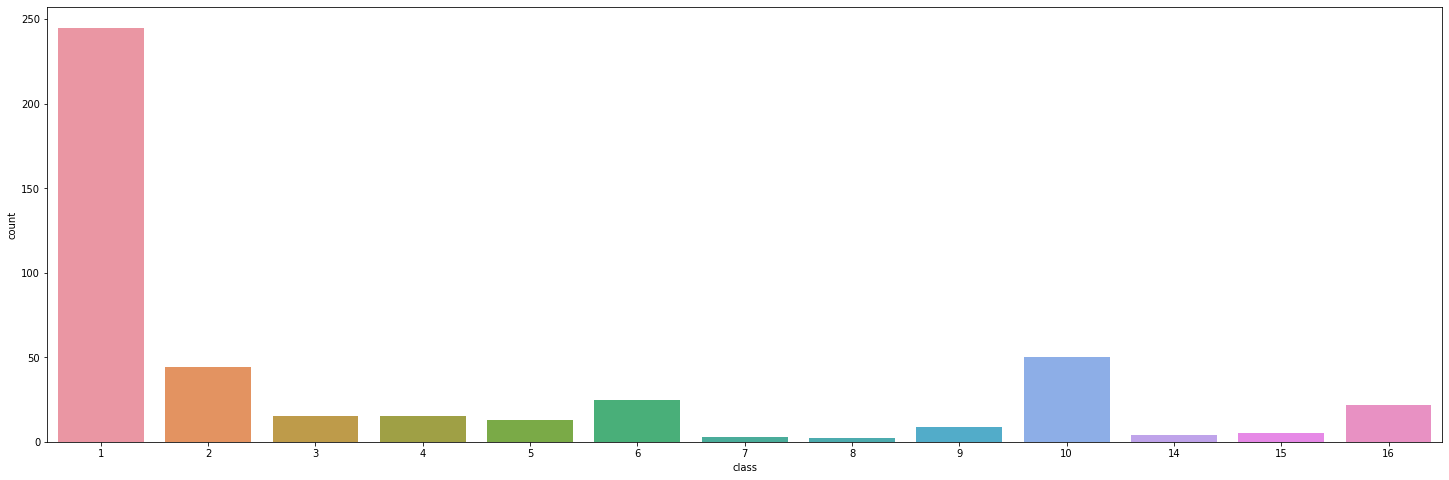

In [43]:
# count plot on single categorical variable
fig, ax = plt.subplots(figsize=(25, 8))
sns.countplot(x ='class', data = df, ax=ax)

 
# Show the plot
plt.show()

## Hitung outlier

In [44]:
def hitungOutliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [45]:
under5percents = []
more10percents = []
for i in df:
  outliers = hitungOutliers(df[i])
  percentage = len(outliers)/len(df[i])*100
  if percentage <= 3:
    under5percents.append(i)
  if percentage > 10:
    more10percents.append(i)
print(under5percents)
print(more10percents)

['age', 'sex', 'QRS', 'QRST', 'heartrate', 'chDI_Qwave', 'chDI_Swave', 'chDI_RPwave', 'chDI_intrinsicReflecttions', 'chDI_RRwaveExists', 'chDI_DD_RRwaveExists', 'chDI_RPwaveExists', 'chDI_DD_RPwaveExists', 'chDI_RTwaveExists', 'chDI_DD_RTwaveExists', 'chDII_Rwave', 'chDII_Swave', 'chDII_RPwave', 'chDII_SPwave', 'chDII_intrinsicReflecttions', 'chDII_RRwaveExists', 'chDII_DD_RRwaveExists', 'chDII_RPwaveExists', 'chDII_DD_RPwaveExists', 'chDII_RTwaveExists', 'chDII_DD_RTwaveExists', 'chDIII_Rwave', 'chDIII_Swave', 'chDIII_SPwave', 'chDIII_intrinsicReflecttions', 'chDIII_RRwaveExists', 'chDIII_RPwaveExists', 'chDIII_DD_RPwaveExists', 'chDIII_RTwaveExists', 'chDIII_DD_RTwaveExists', 'chAVR_Rwave', 'chAVR_SPwave', 'chAVR_intrinsicReflecttions', 'chAVR_RRwaveExists', 'chAVR_DD_RRwaveExists', 'chAVR_RPwaveExists', 'chAVR_DD_RPwaveExists', 'chAVR_RTwaveExists', 'chAVR_DD_RTwaveExists', 'chAVL_Rwave', 'chAVL_Swave', 'chAVL_RPwave', 'chAVL_intrinsicReflecttions', 'chAVL_DD_RRwaveExists', 'chAVL_R

In [46]:
def mepetOutliers(df):
  for i in under5percents:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)

    IQR = Q3 - Q1

    LB = Q1 - (IQR * 1.5)
    UB = Q3 + (IQR * 1.5)

    df.loc[df[i] > UB, i] = UB
    df.loc[df[i] < LB, i] = LB
df_mepetOutliers = df
mepetOutliers(df_mepetOutliers)

In [47]:
df_mepetOutliers

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_JJwaveAmp,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,0.903614,0.0,0.125926,0.435294,0.270677,0.368321,0.501805,0.241758,0.590244,0.457478,...,0.638554,1.000000,0.381356,0.968531,0.0,0.53125,0.741667,0.507519,0.569579,8
1,0.674699,1.0,0.088889,0.341176,0.195489,0.332061,0.610108,0.150183,0.190244,0.577713,...,0.614458,1.000000,0.360169,1.000000,0.0,0.31250,0.675000,0.485714,0.500971,6
2,0.650602,0.0,0.099259,0.523529,0.624060,0.311069,0.555957,0.282051,0.497561,0.785924,...,0.783133,1.000000,0.402542,0.916084,0.0,0.34375,0.783333,0.424812,0.566990,10
3,0.662651,0.0,0.103704,0.517647,0.338346,0.385496,0.534296,0.260073,0.697561,0.586510,...,0.686747,1.000000,0.516949,0.923077,0.0,0.37500,0.716667,0.592481,0.648544,1
4,0.903614,0.0,0.125926,0.435294,0.248120,0.345420,0.462094,0.252747,0.502439,0.457478,...,0.626506,1.000000,0.555085,0.874126,0.0,0.21875,0.825000,0.523308,0.656311,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,0.638554,1.0,0.081481,0.376471,0.187970,0.379771,0.541516,0.168498,0.570732,0.395894,...,0.674699,1.000000,0.182203,0.825175,0.0,0.46875,0.550000,0.299248,0.246602,1
448,0.445783,0.0,0.125926,0.464706,0.338346,0.261450,0.465704,0.340659,0.356098,0.756598,...,0.614458,1.000000,0.661017,0.944056,0.0,0.37500,0.700000,0.618045,0.653722,10
449,0.433735,0.0,0.090370,0.364706,0.398496,0.335878,0.480144,0.315018,0.565854,0.255132,...,0.819277,1.000000,0.690678,0.816434,0.0,0.71875,0.583333,0.000000,0.134547,2
450,0.385542,1.0,0.074074,0.288235,0.285714,0.202290,0.555957,0.402930,0.307317,0.662757,...,0.698795,0.902439,0.508475,0.975524,0.0,0.40625,0.700000,0.520301,0.551456,1


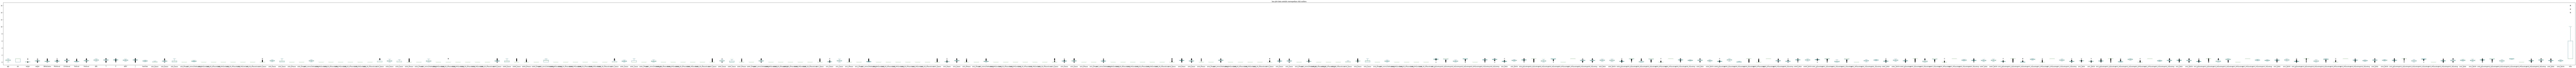

In [48]:
plt.rcParams["figure.figsize"] = [300, 8]
plt.rcParams["figure.autolayout"] = True
ax = df_mepetOutliers[df_mepetOutliers.columns].plot(kind='box', title='box plot data setelah memepetkan nilai outliers')

In [49]:
col1len = []
for col in df_mepetOutliers:
    if (len(df_mepetOutliers[col].unique()) == 1):
      col1len.append(col)
print(col1len)

['chDI_RPwave', 'chDI_RRwaveExists', 'chDI_DD_RRwaveExists', 'chDI_RPwaveExists', 'chDI_DD_RPwaveExists', 'chDI_RTwaveExists', 'chDI_DD_RTwaveExists', 'chDII_RPwave', 'chDII_SPwave', 'chDII_RRwaveExists', 'chDII_DD_RRwaveExists', 'chDII_RPwaveExists', 'chDII_DD_RPwaveExists', 'chDII_RTwaveExists', 'chDII_DD_RTwaveExists', 'chDIII_SPwave', 'chDIII_RRwaveExists', 'chDIII_RPwaveExists', 'chDIII_DD_RPwaveExists', 'chDIII_RTwaveExists', 'chDIII_DD_RTwaveExists', 'chAVR_SPwave', 'chAVR_RRwaveExists', 'chAVR_DD_RRwaveExists', 'chAVR_RPwaveExists', 'chAVR_DD_RPwaveExists', 'chAVR_RTwaveExists', 'chAVR_DD_RTwaveExists', 'chAVL_RPwave', 'chAVL_DD_RRwaveExists', 'chAVL_RPwaveExists', 'chAVL_DD_RPwaveExists', 'chAVL_RTwaveExists', 'chAVL_DD_RTwaveExists', 'chAVF_SPwave', 'chAVF_RRwaveExists', 'chAVF_DD_RRwaveExists', 'chAVF_DD_RPwaveExists', 'chAVF_RTwaveExists', 'chAVF_DD_RTwaveExists', 'chV1_SPwave', 'chV1_RRwaveExists', 'chV1_DD_RRwaveExists', 'chV1_RPwaveExists', 'chV1_DD_RPwaveExists', 'chV1_

In [50]:
df_mepetOutliers = df_mepetOutliers.drop(col1len, axis=1)

In [51]:
df_mepetOutliers

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV5_QRSTA,chV6_JJwaveAmp,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,0.903614,0.0,0.125926,0.435294,0.270677,0.368321,0.501805,0.241758,0.590244,0.457478,...,0.660574,0.638554,1.000000,0.381356,0.968531,0.53125,0.741667,0.507519,0.569579,8
1,0.674699,1.0,0.088889,0.341176,0.195489,0.332061,0.610108,0.150183,0.190244,0.577713,...,0.558747,0.614458,1.000000,0.360169,1.000000,0.31250,0.675000,0.485714,0.500971,6
2,0.650602,0.0,0.099259,0.523529,0.624060,0.311069,0.555957,0.282051,0.497561,0.785924,...,0.583812,0.783133,1.000000,0.402542,0.916084,0.34375,0.783333,0.424812,0.566990,10
3,0.662651,0.0,0.103704,0.517647,0.338346,0.385496,0.534296,0.260073,0.697561,0.586510,...,0.687206,0.686747,1.000000,0.516949,0.923077,0.37500,0.716667,0.592481,0.648544,1
4,0.903614,0.0,0.125926,0.435294,0.248120,0.345420,0.462094,0.252747,0.502439,0.457478,...,0.587467,0.626506,1.000000,0.555085,0.874126,0.21875,0.825000,0.523308,0.656311,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,0.638554,1.0,0.081481,0.376471,0.187970,0.379771,0.541516,0.168498,0.570732,0.395894,...,0.328982,0.674699,1.000000,0.182203,0.825175,0.46875,0.550000,0.299248,0.246602,1
448,0.445783,0.0,0.125926,0.464706,0.338346,0.261450,0.465704,0.340659,0.356098,0.756598,...,0.762924,0.614458,1.000000,0.661017,0.944056,0.37500,0.700000,0.618045,0.653722,10
449,0.433735,0.0,0.090370,0.364706,0.398496,0.335878,0.480144,0.315018,0.565854,0.255132,...,0.156070,0.819277,1.000000,0.690678,0.816434,0.71875,0.583333,0.000000,0.134547,2
450,0.385542,1.0,0.074074,0.288235,0.285714,0.202290,0.555957,0.402930,0.307317,0.662757,...,0.650653,0.698795,0.902439,0.508475,0.975524,0.40625,0.700000,0.520301,0.551456,1


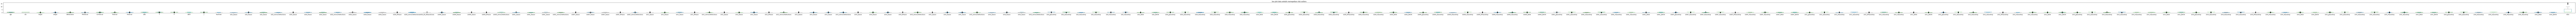

In [52]:
plt.rcParams["figure.figsize"] = [300, 2]
plt.rcParams["figure.autolayout"] = True
ax = df_mepetOutliers[df_mepetOutliers.columns].plot(kind='box', title='box plot data setelah memepetkan nilai outliers')

## Split dataset

In [53]:
X = df.iloc[:,:-1]
y = df['class']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

In [55]:
X_train.shape

(361, 262)

In [56]:
X_test.shape

(91, 262)

In [57]:
X_train

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV5_QRSTA,chV6_JJwaveAmp,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA
72,0.373494,1.0,0.082963,0.394118,0.285714,0.330153,0.465704,0.205128,0.526829,0.689150,...,0.517493,0.674699,0.829268,0.360169,1.000000,0.0,0.46875,0.625000,0.569173,0.531392
386,0.939759,0.0,0.069630,0.235294,0.315789,0.230916,0.541516,0.424908,0.268293,0.759531,...,0.555614,0.602410,1.000000,0.394068,0.930070,0.0,0.15625,0.516667,0.430075,0.348867
15,0.566265,1.0,0.066667,0.247059,0.150376,0.251908,0.425993,0.223443,0.317073,0.609971,...,0.548825,0.674699,1.000000,0.326271,0.972028,0.0,0.43750,0.641667,0.461654,0.451133
156,0.542169,1.0,0.084444,0.323529,0.150376,0.232824,0.451264,0.128205,0.351220,0.651026,...,0.521671,0.566265,1.000000,0.491525,1.000000,0.0,0.46875,0.616667,0.541353,0.482201
138,0.421687,1.0,0.084444,0.364706,0.187970,0.297710,0.476534,0.095238,0.565854,0.680352,...,0.474151,0.662651,0.853659,0.432203,0.944056,0.0,0.65625,0.583333,0.460150,0.402589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,0.506024,1.0,0.081481,0.364706,0.195489,0.280534,0.379061,0.084249,0.468293,0.501466,...,0.412533,0.626506,1.000000,0.360169,0.930070,0.0,0.46875,0.508333,0.468421,0.370227
424,0.084337,0.0,0.020741,0.088235,0.639098,0.299618,0.743682,0.432234,0.395122,0.387097,...,0.761880,0.771084,1.000000,0.423729,0.926573,0.0,0.56250,0.958333,0.608271,0.744903
414,0.807229,1.0,0.088889,0.276471,0.172932,0.343511,0.418773,0.065934,0.546341,0.721408,...,0.621410,0.614458,1.000000,0.576271,1.000000,0.0,0.46875,0.633333,0.639098,0.577994
98,0.626506,1.0,0.074074,0.576471,0.218045,0.358779,0.787004,0.311355,0.434146,0.568915,...,0.334204,0.662651,1.000000,0.322034,0.870629,0.0,0.37500,0.558333,0.396992,0.351456


In [58]:
X_test

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV5_QRSTA,chV6_JJwaveAmp,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA
372,0.578313,0.0,0.114074,0.417647,0.165414,0.374046,0.335740,0.465201,0.507317,0.639296,...,0.460574,0.614458,1.000000,0.406780,0.940559,0.0,0.43750,0.525000,0.482707,0.403236
254,0.795181,1.0,0.081481,0.694118,0.330827,0.293893,0.350181,0.234432,0.463415,0.363636,...,0.364491,0.674699,1.000000,0.182203,0.818182,0.0,0.43750,0.641667,0.278195,0.280259
26,0.409639,0.0,0.096296,0.394118,0.293233,0.354962,0.509025,0.424908,0.609756,0.768328,...,0.839621,0.638554,1.000000,0.648305,0.961538,0.0,0.43750,0.716667,0.663158,0.692557
13,0.361446,0.0,0.096296,0.394118,0.270677,0.343511,0.444043,0.179487,0.507317,0.703812,...,0.749347,0.602410,0.780488,0.521186,1.000000,0.0,0.37500,0.675000,0.546617,0.564401
92,0.759036,1.0,0.085926,0.329412,0.180451,0.305344,0.501805,0.230769,0.487805,0.530792,...,0.481984,0.734940,1.000000,0.169492,0.926573,0.0,0.53125,0.691667,0.376692,0.427832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,0.771084,0.0,0.081481,0.335294,0.210526,0.000000,0.476534,0.043956,0.439024,0.589443,...,0.451697,0.674699,1.000000,0.283898,0.986014,0.0,0.34375,0.533333,0.510526,0.420712
218,0.602410,0.0,0.096296,0.435294,0.278195,0.339695,0.321300,0.322344,0.482927,0.662757,...,0.205222,0.783133,0.000000,0.000000,1.000000,0.0,0.50000,0.483333,0.227820,0.152104
61,0.421687,1.0,0.081481,0.264706,0.172932,0.280534,0.332130,0.172161,0.365854,0.621701,...,0.530548,0.626506,0.902439,0.402542,0.916084,0.0,0.46875,0.700000,0.422556,0.464078
175,0.650602,1.0,0.081481,0.341176,0.120301,0.282443,0.638989,0.113553,0.453659,0.489736,...,0.400522,0.626506,1.000000,0.254237,0.968531,0.0,0.34375,0.591667,0.419549,0.365696


In [59]:
y_test

372     2
254     1
26     14
13      6
92      1
       ..
428     1
218     3
61      5
175     6
258     5
Name: class, Length: 91, dtype: int64

In [60]:
y_train

72      1
386    16
15      1
156     1
138     1
       ..
161     1
424     9
414     1
98      1
133     1
Name: class, Length: 361, dtype: int64

# ANN model with Tensorflow

In [61]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

In [62]:
y_train.unique()

array([ 1, 16, 10,  5,  6,  3,  2,  4,  9, 15, 14,  8,  7])

In [63]:
model =  tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation=tf.nn.tanh),
    tf.keras.layers.Dense(128, activation=tf.nn.tanh),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(17, activation=tf.nn.softmax)
])

In [64]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [65]:
ACCURACY_THRESHOLD = 0.95

In [66]:
class myCallback(tf.keras.callbacks.Callback): 
  def on_epoch_end(self, epoch, logs={}): 
    if(logs.get('acc') is not None and logs.get('acc') >= ACCURACY_THRESHOLD):   
      print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))   
      self.model.stop_training = True

In [67]:
callbacks = myCallback()

In [68]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 3ms/step - loss: 2.0551 - accuracy: 0.5180
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 1.7185 - accuracy: 0.5319
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 1.5108 - accuracy: 0.5706
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 1.4505 - accuracy: 0.5789
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 1.3473 - accuracy: 0.6011
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 1.1967 - accuracy: 0.6620
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 1.1381 - accuracy: 0.6593
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 1.0594 - accuracy: 0.7008
Epoch 9/100
12/12 [==============================] - 0s 4ms/step - loss: 0.9732 - accuracy: 0.7341
Epoch 10/100
12/12 [==============================] - 0s 3ms/step - loss: 0.9074 - accuracy: 0.7562
Epoch 11/

In [69]:
model.evaluate(X_train,y_train)

12/12 [==============================] - 0s 3ms/step - loss: 0.0956 - accuracy: 0.9806


[0.09555134922266006, 0.9806094169616699]

In [70]:
predictions = model.predict(X_test)

3/3 [==============================] - 0s 4ms/step


In [71]:
total_benar = 0
for prediction, y in zip(predictions, y_test):
  print(f"Prediction: {np.argmax(prediction)}, Hasil Y_Test :{y}")
  if np.argmax(prediction)== y:
    total_benar = total_benar + 1

Prediction: 1, Hasil Y_Test :2
Prediction: 16, Hasil Y_Test :1
Prediction: 1, Hasil Y_Test :14
Prediction: 10, Hasil Y_Test :6
Prediction: 1, Hasil Y_Test :1
Prediction: 2, Hasil Y_Test :1
Prediction: 1, Hasil Y_Test :1
Prediction: 1, Hasil Y_Test :1
Prediction: 1, Hasil Y_Test :1
Prediction: 4, Hasil Y_Test :4
Prediction: 4, Hasil Y_Test :4
Prediction: 1, Hasil Y_Test :6
Prediction: 1, Hasil Y_Test :6
Prediction: 1, Hasil Y_Test :1
Prediction: 16, Hasil Y_Test :1
Prediction: 1, Hasil Y_Test :6
Prediction: 16, Hasil Y_Test :10
Prediction: 1, Hasil Y_Test :1
Prediction: 8, Hasil Y_Test :6
Prediction: 1, Hasil Y_Test :16
Prediction: 3, Hasil Y_Test :3
Prediction: 1, Hasil Y_Test :2
Prediction: 16, Hasil Y_Test :1
Prediction: 1, Hasil Y_Test :1
Prediction: 1, Hasil Y_Test :1
Prediction: 10, Hasil Y_Test :10
Prediction: 1, Hasil Y_Test :1
Prediction: 10, Hasil Y_Test :10
Prediction: 2, Hasil Y_Test :2
Prediction: 2, Hasil Y_Test :16
Prediction: 1, Hasil Y_Test :1
Prediction: 10, Hasil Y_Te

In [72]:
print(total_benar)
print(len(y_test))
print("Akurasi :", (total_benar/len(y_test),"%"))

52
91
Akurasi : (0.5714285714285714, '%')
